In [123]:
%matplotlib inline

In [124]:
#Importing

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

In [126]:
#Opening Dataset

In [127]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(69276)

In [128]:
df["type_name"].head()

0    Starting XI
1    Starting XI
2     Half Start
3     Half Start
4           Pass
Name: type_name, dtype: object

In [129]:
df["player_name"].dropna()

4                  David Villa Sánchez
5              Paulo Assunção da Silva
6       Lionel Andrés Messi Cuccittini
7       Lionel Andrés Messi Cuccittini
8             Sergio Busquets i Burgos
                     ...              
4244             Víctor Valdés Arribas
4245             Víctor Valdés Arribas
4246             Víctor Valdés Arribas
4247             Daniel Alves da Silva
4248            Antonio López Guerrero
Name: player_name, Length: 4241, dtype: object

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4251 entries, 0 to 4250
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4251 non-null   object 
 1   index                           4251 non-null   int64  
 2   period                          4251 non-null   int64  
 3   timestamp                       4251 non-null   object 
 4   minute                          4251 non-null   int64  
 5   second                          4251 non-null   int64  
 6   possession                      4251 non-null   int64  
 7   duration                        3113 non-null   float64
 8   match_id                        4251 non-null   int64  
 9   type_id                         4251 non-null   int64  
 10  type_name                       4251 non-null   object 
 11  possession_team_id              4251 non-null   int64  
 12  possession_team_name            42

In [131]:
df["player_name"]=df["player_name"].astype(str)

In [132]:
df["player_name"]=df["player_name"].apply(lambda x: ' '.join([x.split()[0], x.split()[-2]]) if len(x.split()) > 1 else x)

In [133]:
#Getting Team Names
team1, team2 = df.team_name.unique()

In [134]:
#A dataframe of shots
shots = df.loc[df["type_name"]=="Shot"].set_index("id")
shots.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, ce009990-5f5c-42ea-a1cb-9a68712e9052 to f89f6068-8ad8-4362-90de-c4c5c31bc84e
Data columns (total 75 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           24 non-null     int64  
 1   period                          24 non-null     int64  
 2   timestamp                       24 non-null     object 
 3   minute                          24 non-null     int64  
 4   second                          24 non-null     int64  
 5   possession                      24 non-null     int64  
 6   duration                        24 non-null     float64
 7   match_id                        24 non-null     int64  
 8   type_id                         24 non-null     int64  
 9   type_name                       24 non-null     object 
 10  possession_team_id              24 non-null     int64  
 11  possession_team_name            24 

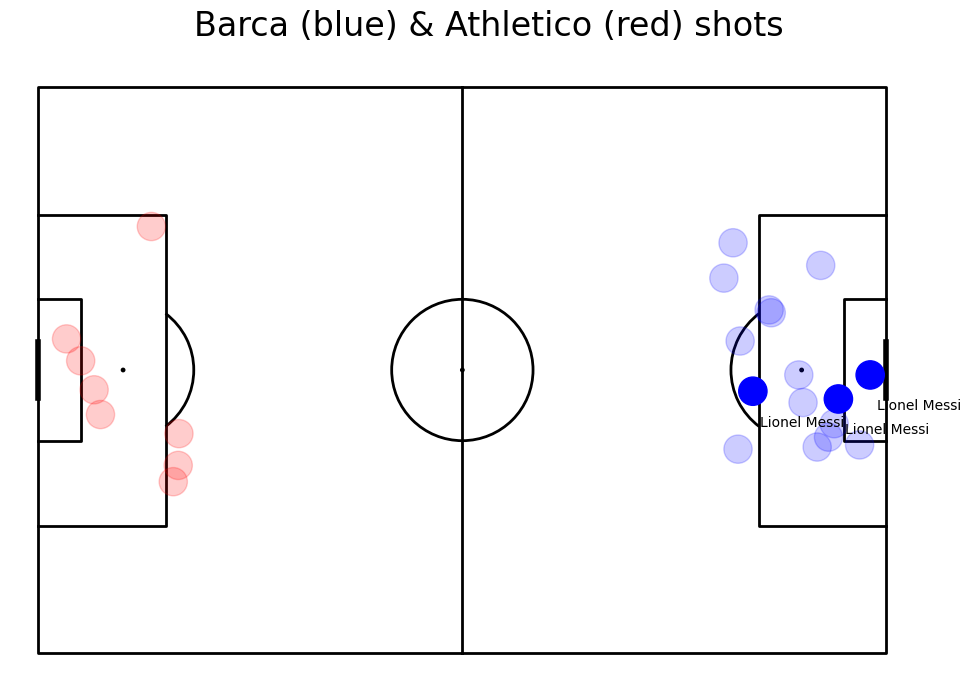

In [137]:
# Shot maps using iteration

pitch = Pitch(line_color="black")
fig, ax = pitch.draw(figsize=(10,7))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    # Get Info
    x=shot["x"]
    y=shot["y"]
    goal = shot['outcome_name']=='Goal'
    team_name=shot["team_name"]
    #set circle size
    circleSize=2
    #if Barca
    if(team_name==team1):
        shotCircle = plt.Circle((x,y),circleSize,color="blue")
        if goal:
            plt.text(x+1,y+5,shot["player_name"])
        else:
            shotCircle.set_alpha(.2)
    #if Athletico
    else:
        shotCircle = plt.Circle((pitchLengthX-x,pitchWidthY-y),circleSize,color="r")
        if goal:
            plt.text(pitchLengthX-x+1,pitchWidthY-y-2,shot["player_name"])
        else:
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

# Set Title
fig.suptitle("Barca (blue) & Athletico (red) shots", fontsize=24)
fig.set_size_inches(10,7)
plt.show()

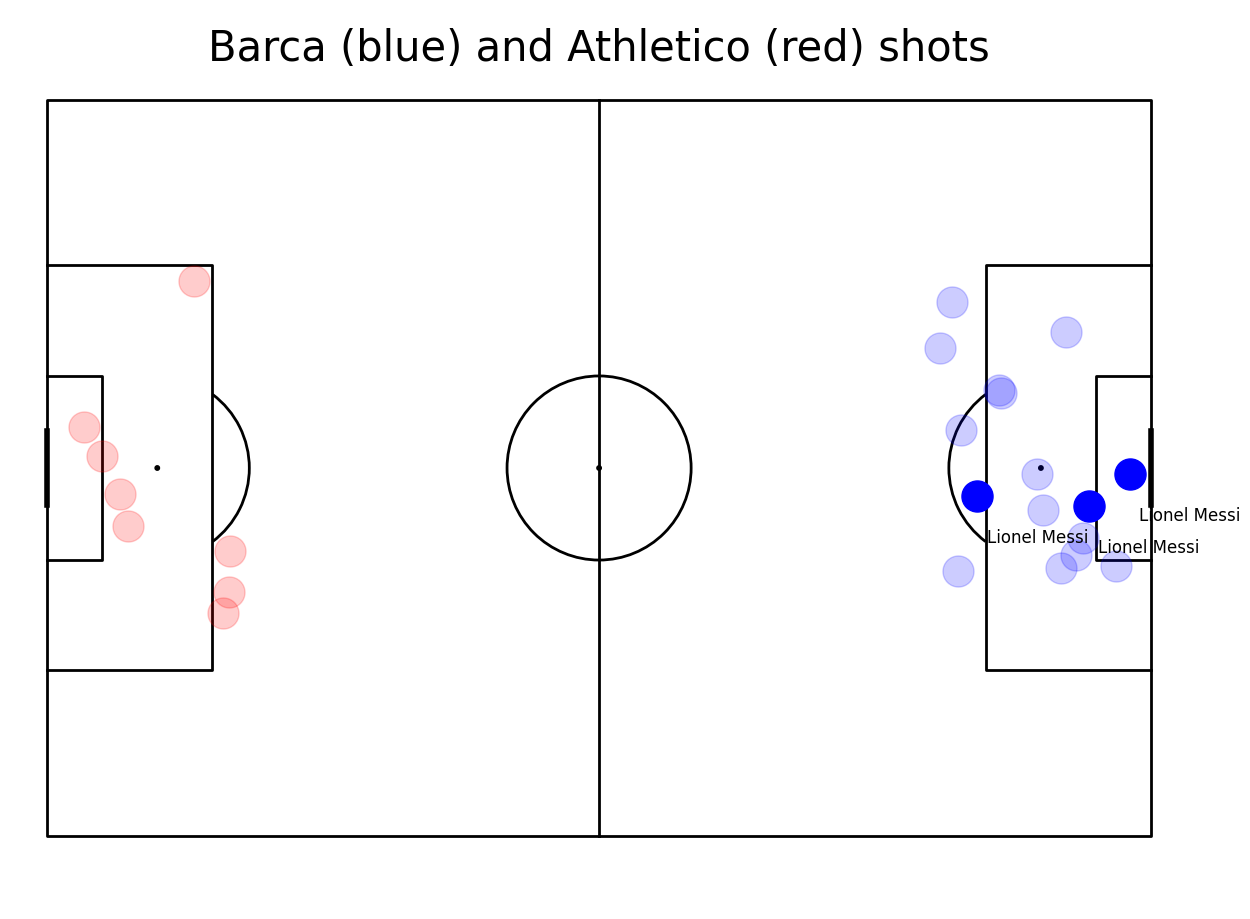

In [145]:
## Using mplsoccer's Pitch class

#creating pitch
pitch = Pitch(line_color="black")
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_barca = (df.type_name == 'Shot') & (df.team_name == team1)
#selecting relevant columns only
df_barca = df.loc[mask_barca, ["x","y","outcome_name","player_name"]]

for i,shot in df_barca.iterrows():
    if shot["outcome_name"]=="Goal":
        pitch.scatter(shot.x,shot.y, alpha=1, s=500, color="blue", ax=ax['pitch'])
        pitch.annotate(shot["player_name"], (shot.x + 1, shot.y + 5), ax=ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(shot.x,shot.y, alpha=.2, s=500, color="blue", ax=ax['pitch'])

#query for athletico
mask_athl = (df.type_name=="Shot") & (df.team_name==team2)
#select relevant cols
df_athl = df.loc[mask_athl,["x","y","outcome_name","player_name"]]

for i,shot in df_athl.iterrows():
    if shot["outcome_name"] == "Goal":
        pitch.scatter(120-shot.x,80-shot.y, alpha=1, s=500, colour="red", ax=ax['pitch'])
        pitch.annotate(shot["player_name"], (120-shot.x + 1, 80-shot.y + 5), ax=ax['pitch'], fontsize = 12)
    else:
        pitch.scatter(120-shot.x,80-shot.y, alpha=.2, s=500, color="red", ax=ax['pitch'])

fig.suptitle("Barca (blue) and Athletico (red) shots", fontsize = 30)           
plt.show()

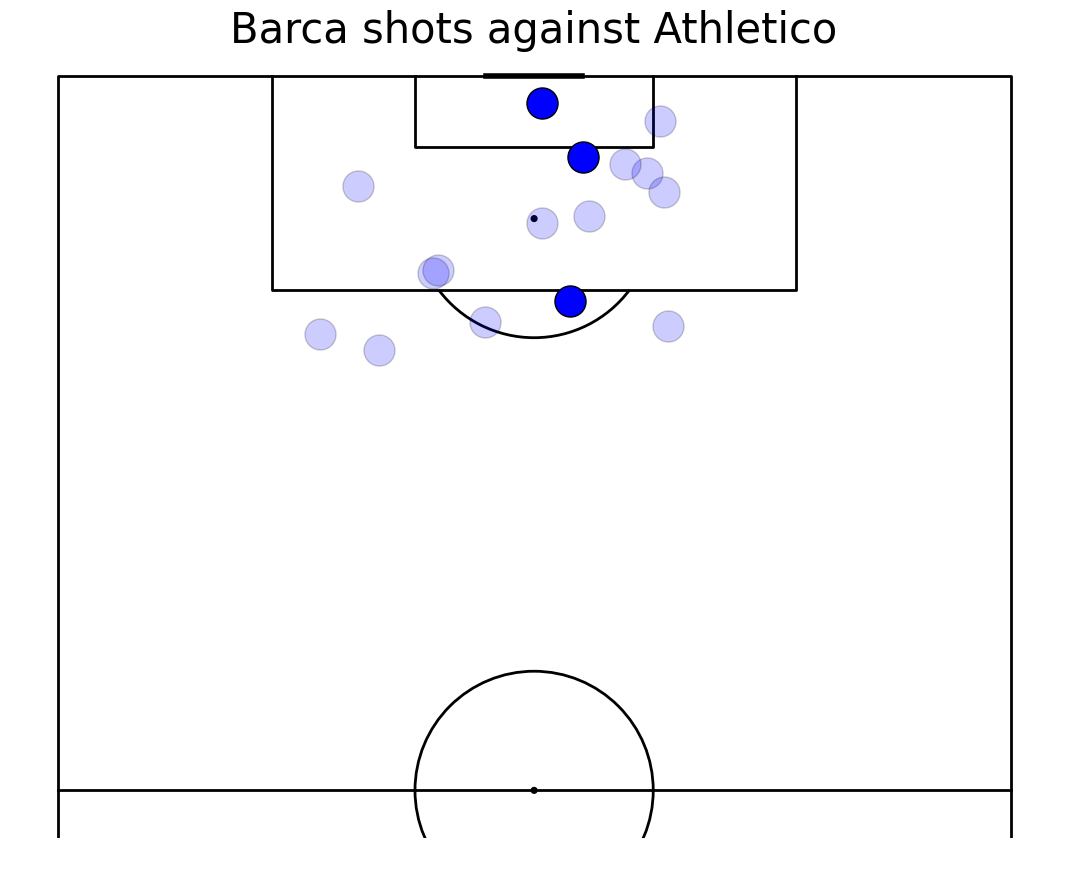

In [162]:
# plotting on one half

pitch = VerticalPitch(line_color="black", half=True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.02, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

# Queries
mask_barca_goal = (df.type_name == 'Shot') & (df.team_name == team1) & (df.outcome_name == "Goal")
mask_barca_no_goal = (df.type_name == 'Shot') & (df.team_name == team1) & (df.outcome_name != "Goal")
df_barca_goal = df.loc[mask_barca_goal,["x","y","player_name"]]
df_barca_no_goal = df.loc[mask_barca_no_goal,["x","y"]]

# Plotting
pitch.scatter(df_barca_goal.x,df_barca_goal.y,alpha=1,s=500, color="blue", ax=ax['pitch'], edgecolors="black")
pitch.scatter(df_barca_no_goal.x,df_barca_no_goal.y,alpha=0.2,s=500, color="blue", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Barca shots against Athletico", fontsize = 30)           
plt.show()